In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('AI ML Internship Training Data.xlsx - freight_delivery_realistic_data.csv')
df.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [3]:
df.shape

(20000, 11)

In [4]:
df.isna().sum()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

In [5]:
rows_with_null = df[df.isnull().any(axis=1)]

In [6]:
rows_with_null

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
66,SHIP000066,Hyderabad,Ahmedabad,2024-03-04,2024-03-08,2024-03-10,NaN,1311,Clear,Heavy,Yes
101,SHIP000101,Ahmedabad,Delhi,2023-05-27,2023-05-30,2023-05-31,NaN,1115,Clear,Moderate,Yes
120,SHIP000120,Bangalore,Mumbai,2023-05-12,2023-05-18,2023-05-19,NaN,1802,Clear,Moderate,Yes
126,SHIP000126,Kolkata,Chennai,2023-10-20,2023-10-21,2023-10-22,NaN,517,Clear,Moderate,Yes
131,SHIP000131,Lucknow,Chennai,2023-12-23,2023-12-25,2023-12-28,NaN,772,Clear,Moderate,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19734,SHIP019734,Lucknow,Jaipur,2023-08-23,2023-08-28,2023-08-29,NaN,1523,Clear,Moderate,Yes
19792,SHIP019792,Kolkata,Lucknow,2023-11-12,2023-11-16,2023-11-20,NaN,1422,Storm,Moderate,Yes
19870,SHIP019870,Mumbai,Hyderabad,2024-04-16,2024-04-19,2024-04-22,NaN,1012,Clear,Moderate,Yes
19963,SHIP019963,Kolkata,Mumbai,2023-09-21,2023-09-22,2023-09-22,NaN,521,Clear,Light,No


In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(19403, 11)

In [9]:
df['Vehicle Type'].unique()

array(['Trailer', 'Truck', 'Container', 'Lorry'], dtype=object)

In [10]:
X = df[['Origin', 'Destination', 'Vehicle Type', 'Distance (km)', 'Weather Conditions', 'Traffic Conditions']]
y = df['Delayed']

In [11]:
X.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions
0,Jaipur,Mumbai,Trailer,1603,Rain,Light
1,Bangalore,Delhi,Trailer,1237,Storm,Moderate
2,Mumbai,Chennai,Truck,1863,Clear,Light
3,Hyderabad,Ahmedabad,Container,1374,Clear,Light
4,Chennai,Kolkata,Container,676,Clear,Heavy


In [12]:
X.describe(include='object')

,Origin,Destination,Vehicle Type,Weather Conditions,Traffic Conditions
count,19403,19403,19403,19403,19403
unique,10,10,4,4,3
top,Pune,Jaipur,Lorry,Clear,Light
freq,2044,1989,4878,13521,9655


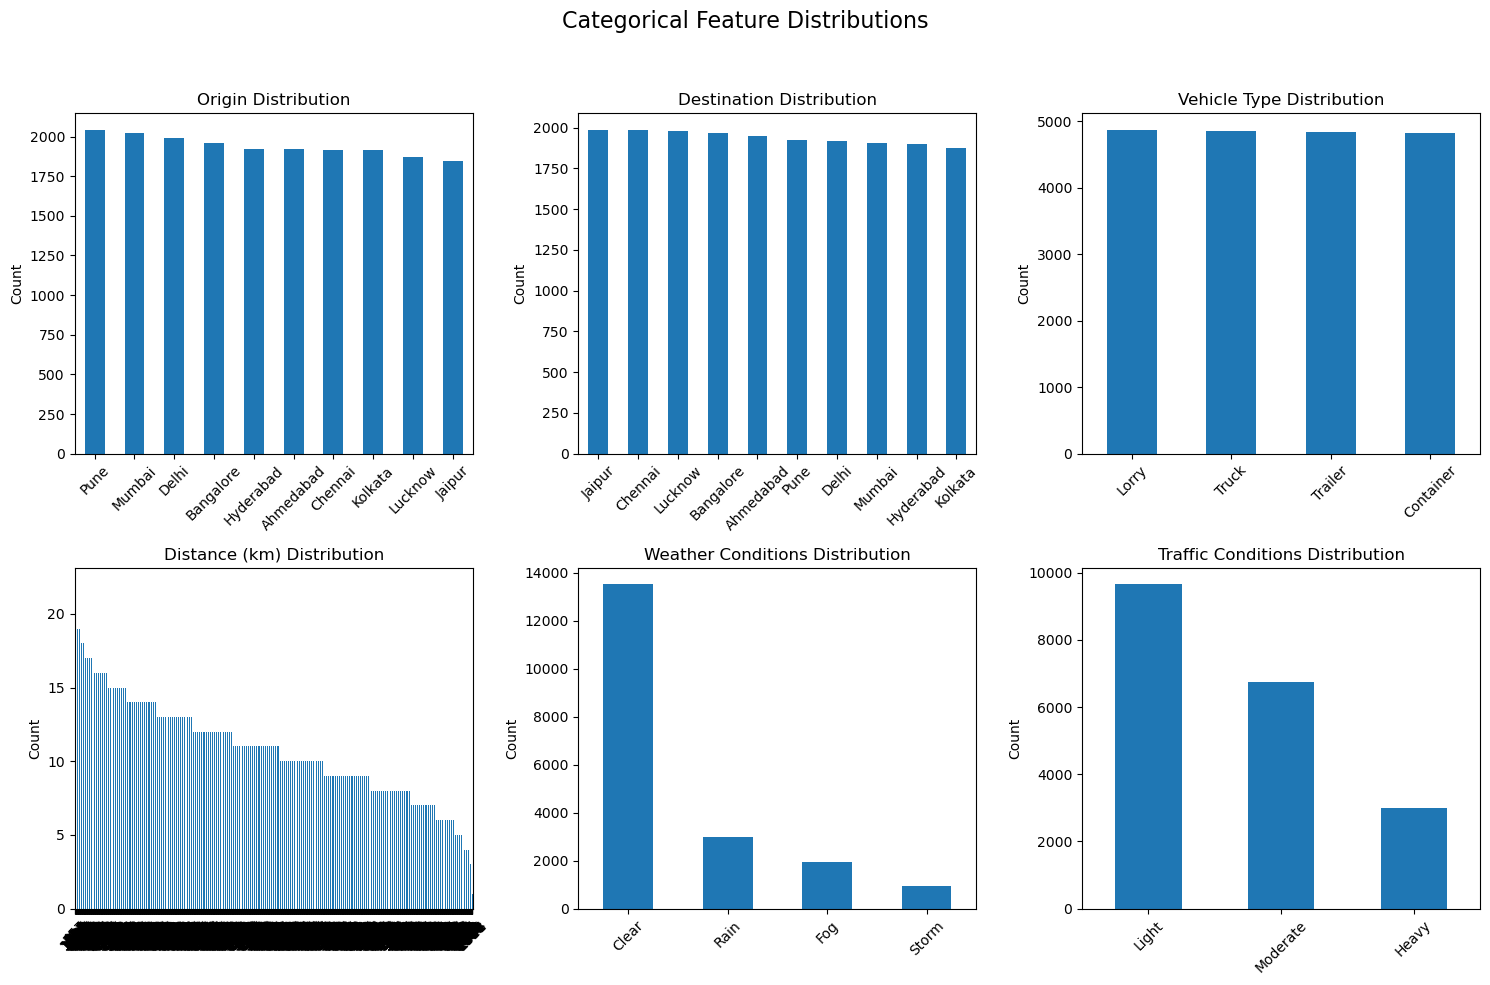

In [13]:
columns = X.columns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Categorical Feature Distributions', fontsize=16)

for i, col in enumerate(columns):
    row = i // 3  
    col_idx = i % 3
    ax = axes[row, col_idx]
    
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])

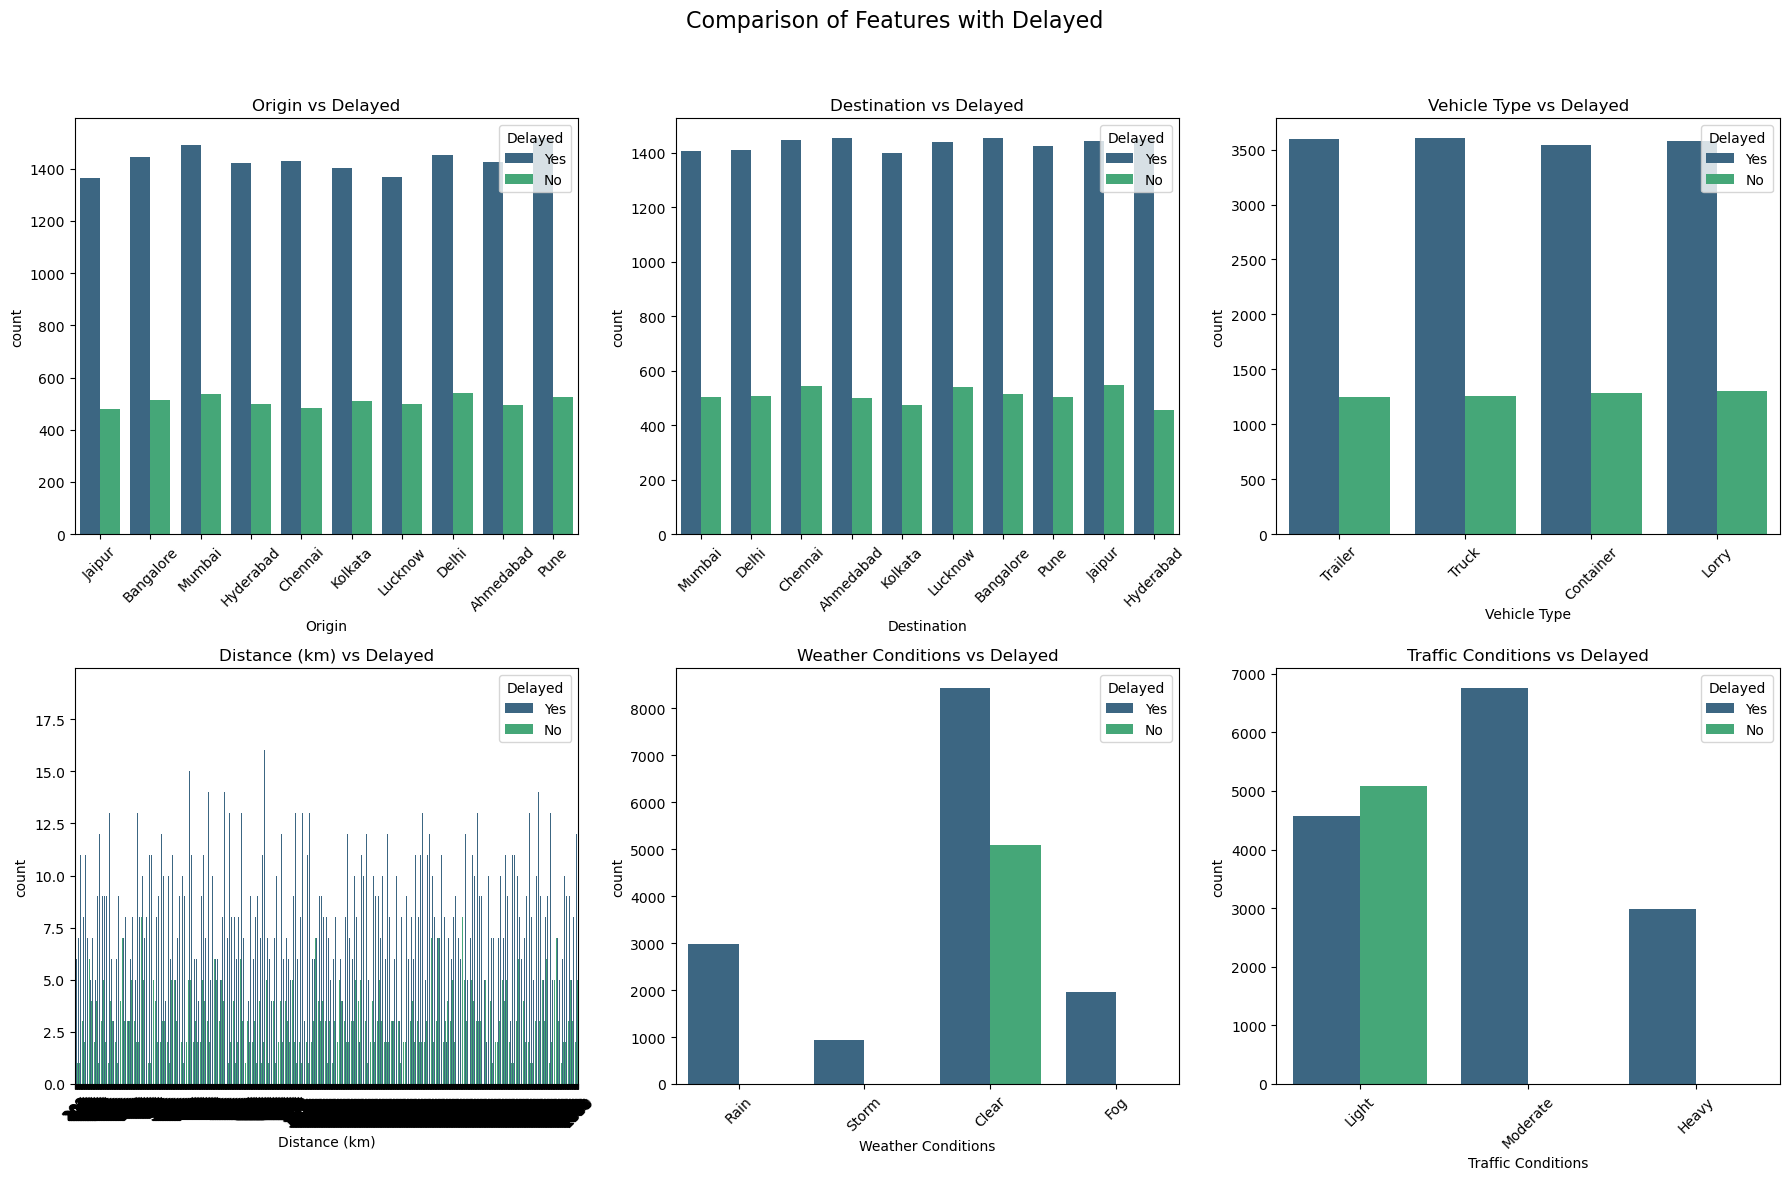

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Features with Delayed', fontsize=16)

for i, col in enumerate(columns):
    row = i // 3  
    col_idx = i % 3  
    ax = axes[row, col_idx]
    
    sns.countplot(x=col, hue='Delayed', data=df, ax=ax, palette='viridis')
    ax.set_title(f'{col} vs Delayed')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_32360\2346406734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['distance_bin'] = pd.cut(X['Distance (km)'], bins=bin_ranges, labels=[f'{i}-{i+100}' for i in bin_ranges[:-1]])


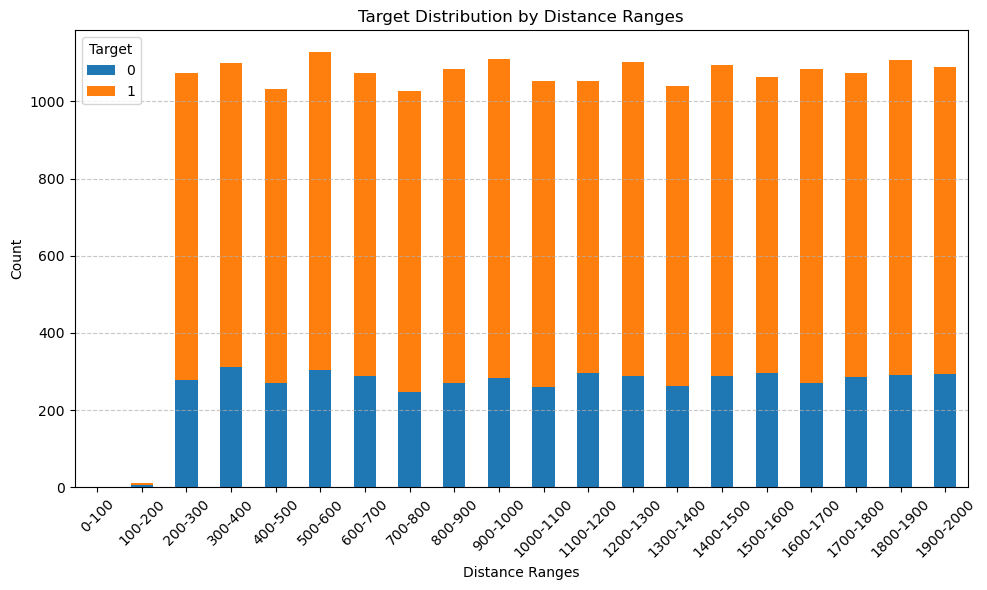

In [78]:
bin_ranges = range(0, X['Distance (km)'].max() + 100, 100) 

X['distance_bin'] = pd.cut(X['Distance (km)'], bins=bin_ranges, labels=[f'{i}-{i+100}' for i in bin_ranges[:-1]])

grouped = X.groupby(['distance_bin', y]).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Target Distribution by Distance Ranges')
plt.xlabel('Distance Ranges')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions']
label_encoder = LabelEncoder()

In [18]:
for col in columns_to_encode:
    X.loc[:, col] = label_encoder.fit_transform(X[col])
    
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Mapping for column '{col}':")
    print(mapping)

X.head()

Mapping for column 'Origin':
{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Jaipur': 5, 'Kolkata': 6, 'Lucknow': 7, 'Mumbai': 8, 'Pune': 9}
Mapping for column 'Destination':
{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Jaipur': 5, 'Kolkata': 6, 'Lucknow': 7, 'Mumbai': 8, 'Pune': 9}
Mapping for column 'Vehicle Type':
{'Container': 0, 'Lorry': 1, 'Trailer': 2, 'Truck': 3}
Mapping for column 'Weather Conditions':
{'Clear': 0, 'Fog': 1, 'Rain': 2, 'Storm': 3}
Mapping for column 'Traffic Conditions':
{'Heavy': 0, 'Light': 1, 'Moderate': 2}


C:\Users\user\AppData\Local\Temp\ipykernel_32360\2011636187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col] = label_encoder.fit_transform(X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_32360\2011636187.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col] = label_encoder.fit_transform(X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_32360\2011636187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions
0,5,8,2,1603,2,1
1,1,3,2,1237,3,2
2,8,2,3,1863,0,1
3,4,0,0,1374,0,1
4,2,6,0,676,0,0


In [19]:
y = label_encoder.fit_transform(y)

In [20]:
X_corr = X
X_corr['target'] = y
correlation_matrix = X.corr()
correlation_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_32360\48027410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_corr['target'] = y


,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,target
Origin,1.000000,-0.115368,0.007619,0.007484,0.001334,0.013186,-0.002834
Destination,-0.115368,1.000000,-0.000541,-0.005399,-0.011722,-0.018734,-0.002524
Vehicle Type,0.007619,-0.000541,1.000000,0.001916,0.014187,0.005770,0.008258
Distance (km),0.007484,-0.005399,0.001916,1.000000,0.002754,-0.003514,-0.000172
Weather Conditions,0.001334,-0.011722,0.014187,0.002754,1.000000,0.007975,0.358962
Traffic Conditions,0.013186,-0.018734,0.005770,-0.003514,0.007975,1.000000,0.169750
target,-0.002834,-0.002524,0.008258,-0.000172,0.358962,0.169750,1.000000


In [21]:
correlation_matrix['target'].sort_values(ascending=False)

target                1.000000
Weather Conditions    0.358962
Traffic Conditions    0.169750
Vehicle Type          0.008258
Distance (km)        -0.000172
Destination          -0.002524
Origin               -0.002834
Name: target, dtype: float64

In [109]:
X_new = X[['Vehicle Type', 'Weather Conditions', 'Traffic Conditions']]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.7, random_state=42, shuffle = True)

In [112]:
X_train

,Vehicle Type,Weather Conditions,Traffic Conditions
10619,1,0,2
17556,3,1,2
7316,1,0,1
19077,3,0,2
3853,0,2,1
...,...,...,...
11655,3,0,2
12351,2,0,1
5573,2,2,1
886,2,3,1


In [113]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.24      0.31      1524
           1       0.77      0.89      0.82      4297

    accuracy                           0.72      5821
   macro avg       0.60      0.56      0.57      5821
weighted avg       0.68      0.72      0.69      5821



In [114]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1524
           1       0.92      0.92      0.92      4297

    accuracy                           0.88      5821
   macro avg       0.84      0.84      0.84      5821
weighted avg       0.88      0.88      0.88      5821



In [115]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1524
           1       1.00      0.88      0.94      4297

    accuracy                           0.91      5821
   macro avg       0.88      0.94      0.90      5821
weighted avg       0.94      0.91      0.92      5821



In [116]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1524
           1       1.00      0.88      0.94      4297

    accuracy                           0.91      5821
   macro avg       0.88      0.94      0.90      5821
weighted avg       0.94      0.91      0.92      5821



In [118]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))